In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
import numpy as np
from decimal import Decimal


freeFormResponses = pd.read_csv("kaggle-survey-2018/freeFormResponses.csv", dtype="unicode")
multipleChoiceResponses = pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv", dtype="unicode")

In [2]:
multipleChoiceResponses

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
6,1142,Male,-1,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,-1,NaN,NaN,NaN,Afraid that others will use my work without gi...,NaN,I had never considered making my work easier f...,NaN,NaN,-1
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
9,641,Male,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),Not employed,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
#
# data is messy. the questions are entered into the dataset as the first row so this code cleans up dataset and
# makes the questions the names of the columns
#
multipleChoiceResponses.columns = multipleChoiceResponses.iloc[0]
multipleChoiceResponses = multipleChoiceResponses.iloc[1:]
multipleChoiceResponses.head()

,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [4]:
countries = multipleChoiceResponses.iloc[:,4]
genders = multipleChoiceResponses.iloc[:,1]
ages = multipleChoiceResponses.iloc[:,3]
degree = multipleChoiceResponses.iloc[:,5]

In [5]:
male = multipleChoiceResponses[multipleChoiceResponses["What is your gender? - Selected Choice"] == "Male"]
female = multipleChoiceResponses[multipleChoiceResponses["What is your gender? - Selected Choice"] == "Female"]

print("Male count: ", len(male))
print("Female count: ", len(female))
print("Total count: ", (len(male)+len(female)), "\n\n")

# Most popular industry
maleIndustry = male.iloc[:,9]
print("Male most popular industry:\n", maleIndustry.value_counts()[:5], "\n")

femaleIndustry = female.iloc[:,9]
print("Female most popular industry:\n", femaleIndustry.value_counts()[:5], "\n")

totalIndustry = multipleChoiceResponses.iloc[:,9]
print("Total most popular industry:\n", totalIndustry.value_counts()[:5], "\n\n")


# Most popular language
maleLanguage = male.iloc[:,86]
print("Male most popular language:\n", maleLanguage.value_counts()[:5], "\n")

femaleLanguage = female.iloc[:,86]
print("Female most popular language:\n", femaleLanguage.value_counts()[:5], "\n")

totalLanguage = multipleChoiceResponses.iloc[:,86]
print("Total most popular language:\n", totalLanguage.value_counts()[:5], "\n\n")

# Most popular role
print("Total most popular role:\n", multipleChoiceResponses.iloc[:,7].value_counts()[:8], "\n\n")

Male count:  19430
Female count:  4010
Total count:  23440 


Male most popular industry:
 Computers/Technology    4662
I am a student          3691
Academics/Education     2164
Accounting/Finance      1215
Other                    761
Name: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice, dtype: int64 

Female most popular industry:
 I am a student          912
Computers/Technology    845
Academics/Education     533
Accounting/Finance      193
Other                   159
Name: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice, dtype: int64 

Total most popular industry:
 Computers/Technology    5584
I am a student          4658
Academics/Education     2749
Accounting/Finance      1433
Other                    940
Name: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice, dtype: int64 


Male most popul

In [6]:
roles = multipleChoiceResponses.iloc[:,7]

rolesStudent = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Student"]
rolesDataScientist = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Data Scientist"]
rolesSoftwareEngineer = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Software Engineer"]
rolesDataAnalyst = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Data Analyst"]
rolesResearchScientist = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Research Scientist"]
rolesConsultant = multipleChoiceResponses[multipleChoiceResponses["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"] == "Consultant"]

In [7]:
print("Who considers ML models as \"Black boxes\":\n", multipleChoiceResponses.iloc[:,372].value_counts(), "\n")

Who considers ML models as "Black boxes":
 I am confident that I can understand and explain the outputs of many but not all ML models             6411
I view ML models as "black boxes" but I am confident that experts are able to explain model outputs    2936
Yes, most ML models are "black boxes"                                                                  1635
I am confident that I can explain the outputs of most if not all ML models                             1213
I do not know; I have no opinion on the matter                                                         1173
Name: Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?, dtype: int64 



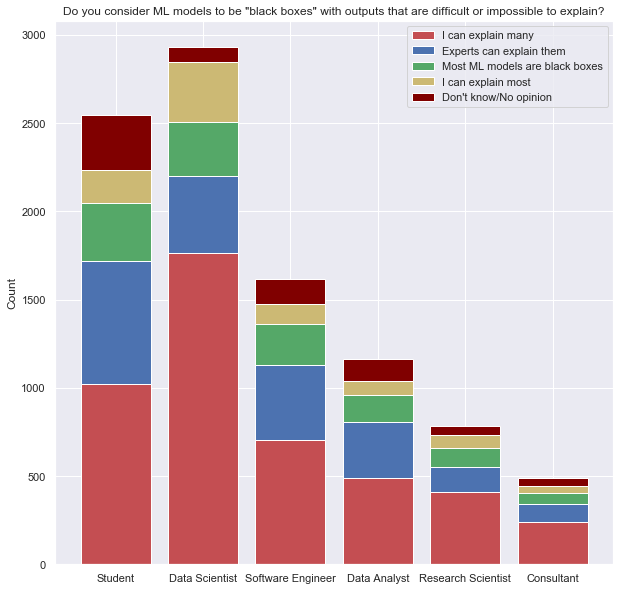

In [8]:
i_can_explain_most = "I am confident that I can understand and explain the outputs of many but not all ML models"
experts_can_explain = "I view ML models as \"black boxes\" but I am confident that experts are able to explain model outputs"
most_are_black_boxes = "Yes, most ML models are \"black boxes\""
i_can_explain_many = "I am confident that I can explain the outputs of most if not all ML models"
i_dont_know = "I do not know; I have no opinion on the matter"

# for students
students_i_most = rolesStudent[rolesStudent.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
students_experts = rolesStudent[rolesStudent.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
students_most_black_boxes = rolesStudent[rolesStudent.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
students_i_many = rolesStudent[rolesStudent.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
students_dont_know = rolesStudent[rolesStudent.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

# for data scientists
dataSci_i_most = rolesDataScientist[rolesDataScientist.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
dataSci_experts = rolesDataScientist[rolesDataScientist.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
dataSci_most_black_boxes = rolesDataScientist[rolesDataScientist.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
dataSci_i_many = rolesDataScientist[rolesDataScientist.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
dataSci_dont_know = rolesDataScientist[rolesDataScientist.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

# software engineers
se_i_most = rolesSoftwareEngineer[rolesSoftwareEngineer.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
se_experts = rolesSoftwareEngineer[rolesSoftwareEngineer.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
se_most_black_boxes = rolesSoftwareEngineer[rolesSoftwareEngineer.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
se_i_many = rolesSoftwareEngineer[rolesSoftwareEngineer.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
se_dont_know = rolesSoftwareEngineer[rolesSoftwareEngineer.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

# data analysts
da_i_most = rolesDataAnalyst[rolesDataAnalyst.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
da_experts = rolesDataAnalyst[rolesDataAnalyst.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
da_most_black_boxes = rolesDataAnalyst[rolesDataAnalyst.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
da_i_many = rolesDataAnalyst[rolesDataAnalyst.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
da_dont_know = rolesDataAnalyst[rolesDataAnalyst.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

# research scientist
rs_i_most = rolesResearchScientist[rolesResearchScientist.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
rs_experts = rolesResearchScientist[rolesResearchScientist.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
rs_most_black_boxes = rolesResearchScientist[rolesResearchScientist.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
rs_i_many = rolesResearchScientist[rolesResearchScientist.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
rs_dont_know = rolesResearchScientist[rolesResearchScientist.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

# consultant
c_i_most = rolesConsultant[rolesConsultant.iloc[:,372]==i_can_explain_most].iloc[:,372].value_counts()
c_experts = rolesConsultant[rolesConsultant.iloc[:,372]==experts_can_explain].iloc[:,372].value_counts()
c_most_black_boxes = rolesConsultant[rolesConsultant.iloc[:,372]==most_are_black_boxes].iloc[:,372].value_counts()
c_i_many = rolesConsultant[rolesConsultant.iloc[:,372]==i_can_explain_many].iloc[:,372].value_counts()
c_dont_know = rolesConsultant[rolesConsultant.iloc[:,372]==i_dont_know].iloc[:,372].value_counts()

f, ax = plt.subplots(figsize=(10,10))
p1 = plt.bar(1, students_i_most, color='r')
p2 = plt.bar(1, students_experts, bottom=students_i_most, color='b')
p3 = plt.bar(1, students_most_black_boxes, bottom=np.array(students_i_most)+np.array(students_experts), color='g')
p4 = plt.bar(1, students_i_many, bottom=np.array(students_most_black_boxes)+np.array(students_i_most)+np.array(students_experts),color='y')
p5 = plt.bar(1, students_dont_know, bottom=np.array(students_i_many)+np.array(students_most_black_boxes)+np.array(students_i_most)+np.array(students_experts),color='maroon')

p6 = plt.bar(2, dataSci_i_most, color='r')
p7 = plt.bar(2, dataSci_experts, bottom=dataSci_i_most, color='b')
p8 = plt.bar(2, dataSci_most_black_boxes, bottom=np.array(dataSci_i_most)+np.array(dataSci_experts), color='g')
p9 = plt.bar(2, dataSci_i_many, bottom=np.array(dataSci_most_black_boxes)+np.array(dataSci_i_most)+np.array(dataSci_experts),color='y')
p10 = plt.bar(2, dataSci_dont_know, bottom=np.array(dataSci_i_many)+np.array(dataSci_most_black_boxes)+np.array(dataSci_i_most)+np.array(dataSci_experts),color='maroon')

p11 = plt.bar(3, se_i_most, color='r')
p12 = plt.bar(3, se_experts, bottom=se_i_most, color='b')
p13 = plt.bar(3, se_most_black_boxes, bottom=np.array(se_i_most)+np.array(se_experts), color='g')
p14 = plt.bar(3, se_i_many, bottom=np.array(se_most_black_boxes)+np.array(se_i_most)+np.array(se_experts),color='y')
p15 = plt.bar(3, se_dont_know, bottom=np.array(se_i_many)+np.array(se_most_black_boxes)+np.array(se_i_most)+np.array(se_experts),color='maroon')

p16 = plt.bar(4, da_i_most, color='r')
p17 = plt.bar(4, da_experts, bottom=da_i_most, color='b')
p18 = plt.bar(4, da_most_black_boxes, bottom=np.array(da_i_most)+np.array(da_experts), color='g')
p19 = plt.bar(4, da_i_many, bottom=np.array(da_most_black_boxes)+np.array(da_i_most)+np.array(da_experts),color='y')
p20 = plt.bar(4, da_dont_know, bottom=np.array(da_i_many)+np.array(da_most_black_boxes)+np.array(da_i_most)+np.array(da_experts),color='maroon')

p21 = plt.bar(5, rs_i_most, color='r')
p22 = plt.bar(5, rs_experts, bottom=rs_i_most, color='b')
p23 = plt.bar(5, rs_most_black_boxes, bottom=np.array(rs_i_most)+np.array(rs_experts), color='g')
p24 = plt.bar(5, rs_i_many, bottom=np.array(rs_most_black_boxes)+np.array(rs_i_most)+np.array(rs_experts),color='y')
p25 = plt.bar(5, rs_dont_know, bottom=np.array(rs_i_many)+np.array(rs_most_black_boxes)+np.array(rs_i_most)+np.array(rs_experts),color='maroon')

p26 = plt.bar(6, c_i_most, color='r')
p27 = plt.bar(6, c_experts, bottom=c_i_most, color='b')
p28 = plt.bar(6, c_most_black_boxes, bottom=np.array(c_i_most)+np.array(c_experts), color='g')
p29 = plt.bar(6, c_i_many, bottom=np.array(c_most_black_boxes)+np.array(c_i_most)+np.array(c_experts),color='y')
p30 = plt.bar(6, c_dont_know, bottom=np.array(c_i_many)+np.array(c_most_black_boxes)+np.array(c_i_most)+np.array(c_experts),color='maroon')

xticks = ['Students', 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', 'Consultant']
#plt.xticklabels(('Students', 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', 'Consultant'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('I can explain many', 'Experts can explain them', 'Most ML models are black boxes', 'I can explain most', 'Don\'t know/No opinion'))
ax.set_xticklabels(['Student', 'Student', 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', 'Consultant'])
plt.ylabel("Count")
plt.title("Do you consider ML models to be \"black boxes\" with outputs that are difficult or impossible to explain?")
plt.show()

In [9]:
print("Time spent coding:\n", multipleChoiceResponses.iloc[:,126].value_counts(), "\n")
print("How long have been writing code:\n", multipleChoiceResponses.iloc[:,127].value_counts(), "\n")
print("Who considers themself a data scientist:\n", multipleChoiceResponses.iloc[:,129].value_counts(), "\n")

Time spent coding:
 50% to 74% of my time    5539
25% to 49% of my time    5015
1% to 25% of my time     4197
75% to 99% of my time    2768
0% of my time             544
100% of my time           484
Name: Approximately what percent of your time at work or school is spent actively coding?, dtype: int64 

How long have been writing code:
 1-2 years                                               5359
< 1 year                                                4542
3-5 years                                               4023
5-10 years                                              2145
10-20 years                                             1102
I have never written code but I want to learn            821
20-30 years                                              321
30-40 years                                              117
40+ years                                                 62
I have never written code and I do not want to learn      41
Name: How long have you been writing code to analy

In [10]:
# people who do not spend time exploring unfair bias
thosePeople = multipleChoiceResponses[multipleChoiceResponses.iloc[:,342] == "0"]
print("Gender:\n", thosePeople.iloc[:,1].value_counts(), "\n")
print("Age:\n", thosePeople.iloc[:,3].value_counts(), "\n")
print("Country:\n", thosePeople.iloc[:,4].value_counts()[:5], "\n")
print("Degree:\n", thosePeople.iloc[:,5].value_counts(), "\n")
print("Profession:\n", thosePeople.iloc[:,7].value_counts()[:5], "\n")
print("Industry:\n", thosePeople.iloc[:,9].value_counts()[:5], "\n")
print("How long writing code to analyze data:\n", thosePeople.iloc[:,127].value_counts(), "\n")
print("How many years using ML methods:\n", thosePeople.iloc[:,128].value_counts(), "\n")
print("Do you consider yourself a data scientist?:\n", thosePeople.iloc[:,129].value_counts(), "\n")
print("What data do you interact with the most?:\n", thosePeople.iloc[:,263].value_counts(), "\n")
# most people who do not spend time exploring unfair bias are male, age 25-29, and have a masters degree

Gender:
 Male                       3083
Female                      566
Prefer not to say            36
Prefer to self-describe      15
Name: What is your gender? - Selected Choice, dtype: int64 

Age:
 25-29    973
30-34    728
22-24    601
35-39    415
18-21    326
40-44    232
45-49    174
50-54    107
55-59     79
60-69     54
80+        6
70-79      5
Name: What is your age (# years)?, dtype: int64 

Country:
 United States of America                                1083
India                                                    376
Germany                                                  188
United Kingdom of Great Britain and Northern Ireland     166
Other                                                    145
Name: In which country do you currently reside?, dtype: int64 

Degree:
 Master’s degree                                                      1764
Bachelor’s degree                                                    1004
Doctoral degree                                       

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

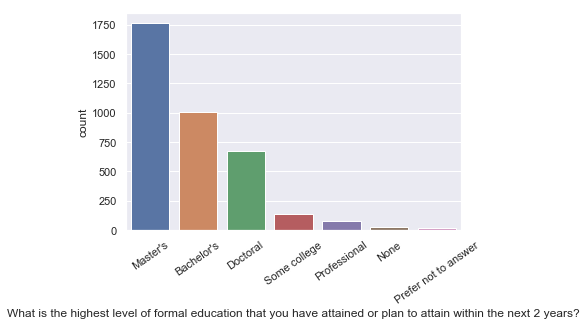

In [11]:
g = sns.countplot(thosePeople.iloc[:,5], order=thosePeople.iloc[:,5].value_counts().index)
g.set(xticklabels = ['Master\'s', 'Bachelor\'s', 'Doctoral', 'Some college', 'Professional', 'None', 'Prefer not to answer'])
plt.xticks(rotation=35)

In [12]:
len(thosePeople)

3700

In [13]:
thosePeople.iloc[:,3].value_counts()

25-29    973
30-34    728
22-24    601
35-39    415
18-21    326
40-44    232
45-49    174
50-54    107
55-59     79
60-69     54
80+        6
70-79      5
Name: What is your age (# years)?, dtype: int64

In [14]:
group25to29 = round(((thosePeople.iloc[:,3].value_counts()[0]/len(thosePeople))*100), 2)
group30to34 = round(((thosePeople.iloc[:,3].value_counts()[1]/len(thosePeople))*100), 2)
group22to24 = round(((thosePeople.iloc[:,3].value_counts()[2]/len(thosePeople))*100), 2)
group35to39 = round(((thosePeople.iloc[:,3].value_counts()[3]/len(thosePeople))*100), 2)
group18to21 = round(((thosePeople.iloc[:,3].value_counts()[4]/len(thosePeople))*100), 2)
group40to44 = round(((thosePeople.iloc[:,3].value_counts()[5]/len(thosePeople))*100), 2)
group45to49 = round(((thosePeople.iloc[:,3].value_counts()[6]/len(thosePeople))*100), 2)
group50to54 = round(((thosePeople.iloc[:,3].value_counts()[7]/len(thosePeople))*100), 2)
group55to59 = round(((thosePeople.iloc[:,3].value_counts()[8]/len(thosePeople))*100), 2)
group60to69 = round(((thosePeople.iloc[:,3].value_counts()[9]/len(thosePeople))*100), 2)
group80 = round(((thosePeople.iloc[:,3].value_counts()[10]/len(thosePeople))*100), 2)
group70to79 = round(((thosePeople.iloc[:,3].value_counts()[11]/len(thosePeople))*100), 2)

print("total of ", len(thosePeople), " people who spend 0-10% time looking for bias")
print("25 to 29: ", group25to29, "%")
print("30 to 34: ", group30to34, "%")
print("22 to 24: ", group22to24, "%")
print("35 to 39: ", group35to39, "%")
print("18 to 21: ", group18to21, "%")
print("40 to 44: ", group40to44, "%")
print("45 to 49: ", group45to49, "%")
print("50 to 54: ", group50to54, "%")
print("55 to 59: ", group55to59, "%")
print("60 to 69: ", group60to69, "%")
print("80+: ", group80, "%")
print("70 to 79: ", group70to79, "%")

total of  3700  people who spend 0-10% time looking for bias
25 to 29:  26.3 %
30 to 34:  19.68 %
22 to 24:  16.24 %
35 to 39:  11.22 %
18 to 21:  8.81 %
40 to 44:  6.27 %
45 to 49:  4.7 %
50 to 54:  2.89 %
55 to 59:  2.14 %
60 to 69:  1.46 %
80+:  0.16 %
70 to 79:  0.14 %


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

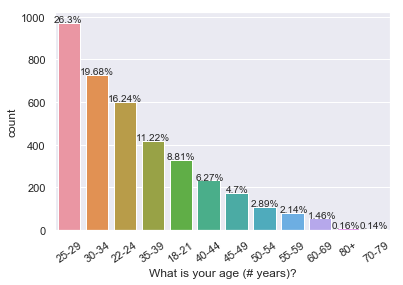

In [15]:
ax = sns.countplot(thosePeople.iloc[:,3], order=thosePeople.iloc[:,3].value_counts().index)
ax.text(-.55, 975, (str(group25to29)+'%'), fontsize=10)
ax.text(.38, 730, (str(group30to34)+'%'), fontsize=10)
ax.text(1.4, 603, (str(group22to24)+'%'), fontsize=10)
ax.text(2.38, 420, (str(group35to39)+'%'), fontsize=10)
ax.text(3.5, 330, (str(group18to21)+'%'), fontsize=10)
ax.text(4.55, 235, (str(group40to44)+'%'), fontsize=10)
ax.text(5.6, 177, (str(group45to49)+'%'), fontsize=10)
ax.text(6.5, 110, (str(group50to54)+'%'), fontsize=10)
ax.text(7.55, 83, (str(group55to59)+'%'), fontsize=10)
ax.text(8.55, 57, (str(group60to69)+'%'), fontsize=10)
ax.text(9.4, 8, (str(group80)+'%'), fontsize=10)
ax.text(10.4, 7, (str(group70to79)+'%'), fontsize=10)
plt.xticks(rotation=35)

In [16]:
print("Why people have not spent time exploring unfair bias in their projects\n")
print("I've never performed this task", thosePeople.iloc[:,348].value_counts().values)
print("Difficulty in collecting enough data about groups that may be unfairly targeted", thosePeople.iloc[:,345].value_counts().values)
print("Difficulty in identifying and selecting the appropriate evaluation metrics", thosePeople.iloc[:,346].value_counts().values)
print("Difficulty in identifying unfairly targeted groups", thosePeople.iloc[:,344].value_counts().values)
print("Lack of communication", thosePeople.iloc[:,343].value_counts().values)
print("I've never found difficulty in this task", thosePeople.iloc[:,347].value_counts().values)

Why people have not spent time exploring unfair bias in their projects

I've never performed this task [2508]
Difficulty in collecting enough data about groups that may be unfairly targeted [615]
Difficulty in identifying and selecting the appropriate evaluation metrics [553]
Difficulty in identifying unfairly targeted groups [463]
Lack of communication [393]
I've never found difficulty in this task [127]


In [17]:
print("Time spent finding unfair bias in dataset/algorithm:\n", multipleChoiceResponses.iloc[:,342].value_counts(), "\n")
print("Time spent exploring model insights:\n", multipleChoiceResponses.iloc[:,355].value_counts(), "\n")
print("Who considers ML models as \"Black boxes\":\n", multipleChoiceResponses.iloc[:,372].value_counts(), "\n")

Time spent finding unfair bias in dataset/algorithm:
 0         3700
0-10      3291
10-20     2065
20-30     1499
30-40      738
40-50      628
50-60      363
60-70      281
70-80      231
90-100     203
80-90      120
Name: Approximately what percent of your data projects involved exploring unfair bias in the dataset and/or algorithm?, dtype: int64 

Time spent exploring model insights:
 10-20     2085
0-10      2068
20-30     1838
0         1555
90-100    1104
30-40     1083
40-50      996
70-80      716
50-60      691
60-70      663
80-90      490
Name: Approximately what percent of your data projects involve exploring model insights?, dtype: int64 

Who considers ML models as "Black boxes":
 I am confident that I can understand and explain the outputs of many but not all ML models             6411
I view ML models as "black boxes" but I am confident that experts are able to explain model outputs    2936
Yes, most ML models are "black boxes"                                          

In [18]:
print("Who considers ML models as \"Black boxes\":\n", multipleChoiceResponses.iloc[:,372].value_counts(), "\n")

Who considers ML models as "Black boxes":
 I am confident that I can understand and explain the outputs of many but not all ML models             6411
I view ML models as "black boxes" but I am confident that experts are able to explain model outputs    2936
Yes, most ML models are "black boxes"                                                                  1635
I am confident that I can explain the outputs of most if not all ML models                             1213
I do not know; I have no opinion on the matter                                                         1173
Name: Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?, dtype: int64 



In [19]:
students = multipleChoiceResponses[multipleChoiceResponses.iloc[:,7] == "Student"]

print("Gender:\n", students.iloc[:,1].value_counts(), "\n")
print("Age:\n", students.iloc[:,3].value_counts(), "\n")
print("Country:\n", students.iloc[:,4].value_counts()[:5], "\n")
print("Degree:\n", students.iloc[:,5].value_counts(), "\n")
print("Time spent finding unfair bias in dataset/algorithm:\n", students.iloc[:,342].value_counts(), "\n")
print("Time spent exploring model insights:\n", students.iloc[:,355].value_counts(), "\n")
print("Language:\n", students.iloc[:,84].value_counts()[:5], "\n")

Gender:
 Male                       4171
Female                     1011
Prefer not to say            53
Prefer to self-describe      18
Name: What is your gender? - Selected Choice, dtype: int64 

Age:
 18-21    2048
22-24    1909
25-29     930
30-34     224
35-39      85
40-44      32
50-54       9
45-49       9
55-59       5
60-69       1
80+         1
Name: What is your age (# years)?, dtype: int64 

Country:
 India                       1323
United States of America     856
China                        715
Germany                      158
Brazil                       154
Name: In which country do you currently reside?, dtype: int64 

Degree:
 Master’s degree                                                      2185
Bachelor’s degree                                                    2127
Doctoral degree                                                       426
Some college/university study without earning a bachelor’s degree     377
Professional degree                             

In [20]:
maleSalary = male.iloc[:,12]
maleSalary.value_counts()

I do not wish to disclose my approximate yearly compensation    3759
0-10,000                                                        3610
10-20,000                                                       1616
20-30,000                                                       1181
30-40,000                                                        933
40-50,000                                                        792
50-60,000                                                        758
100-125,000                                                      713
60-70,000                                                        621
70-80,000                                                        582
90-100,000                                                       477
125-150,000                                                      441
150-200,000                                                      403
80-90,000                                                        399
200-250,000                       

In [21]:
print("Male salary range 100-125,000\n")

maleSalaryHundred = male[male["What is your current yearly compensation (approximate $USD)?"] == "100-125,000"]

print("Top age groups:\n", maleSalaryHundred.iloc[:,3].value_counts()[:5], "\n") # 30-34
print("Top Countries:\n", maleSalaryHundred.iloc[:,4].value_counts()[:5], "\n") # USA
print("Top Degrees:\n", maleSalaryHundred.iloc[:,5].value_counts()[:5], "\n") # Master's degree
print("Top Profession:\n", maleSalaryHundred.iloc[:,9].value_counts()[:5], "\n") # Computers/Technology

Male salary range 100-125,000

Top age groups:
 30-34    172
35-39    147
25-29    123
40-44     82
45-49     49
Name: What is your age (# years)?, dtype: int64 

Top Countries:
 United States of America    403
Canada                       34
Australia                    28
Germany                      25
India                        21
Name: In which country do you currently reside?, dtype: int64 

Top Degrees:
 Master’s degree                                                      371
Doctoral degree                                                      161
Bachelor’s degree                                                    141
Some college/university study without earning a bachelor’s degree     23
Professional degree                                                   11
Name: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?, dtype: int64 

Top Profession:
 Computers/Technology      215
Accounting/Finance         86
Medical

In [22]:
print("Male salary range 0-10,000\n")

maleSalaryTen = male[male["What is your current yearly compensation (approximate $USD)?"] == "0-10,000"]

print("Top age groups:\n", maleSalaryTen.iloc[:,3].value_counts()[:5], "\n") # 22-24
print("Top Countries:\n", maleSalaryTen.iloc[:,4].value_counts()[:5], "\n") # India
print("Top Degrees:\n", maleSalaryTen.iloc[:,5].value_counts()[:5], "\n") # Bachelor's degree
print("Top Profession:\n", maleSalaryTen.iloc[:,9].value_counts()[:5], "\n") # Student

Male salary range 0-10,000

Top age groups:
 22-24    1274
18-21     958
25-29     873
30-34     284
35-39     113
Name: What is your age (# years)?, dtype: int64 

Top Countries:
 India                       1143
China                        371
United States of America     232
Other                        209
Brazil                       184
Name: In which country do you currently reside?, dtype: int64 

Top Degrees:
 Bachelor’s degree                                                    1544
Master’s degree                                                      1411
Doctoral degree                                                       259
Some college/university study without earning a bachelor’s degree     241
Professional degree                                                    96
Name: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?, dtype: int64 

Top Profession:
 I am a student          1456
Computers/Technology     8

In [23]:
femaleSalary = female.iloc[:,12]
femaleSalary.value_counts()

I do not wish to disclose my approximate yearly compensation    864
0-10,000                                                        753
10-20,000                                                       293
20-30,000                                                       199
30-40,000                                                       176
40-50,000                                                       158
50-60,000                                                       150
100-125,000                                                     118
60-70,000                                                       102
80-90,000                                                       101
70-80,000                                                        91
125-150,000                                                      87
90-100,000                                                       82
150-200,000                                                      46
500,000+                                        

In [24]:
print("Female salary range 0-10,000\n")

femaleSalaryTen = female[female["What is your current yearly compensation (approximate $USD)?"] == "0-10,000"]

print("Top age groups:\n", femaleSalaryTen.iloc[:,3].value_counts()[:5], "\n") # 22-24
print("Top Countries:\n", femaleSalaryTen.iloc[:,4].value_counts()[:5], "\n") # India
print("Top Degrees:\n", femaleSalaryTen.iloc[:,5].value_counts()[:5], "\n") # Master's degree
print("Top Profession:\n", femaleSalaryTen.iloc[:,9].value_counts()[:5], "\n") # Student

Female salary range 0-10,000

Top age groups:
 22-24    292
25-29    172
18-21    154
30-34     72
35-39     35
Name: What is your age (# years)?, dtype: int64 

Top Countries:
 India                       163
United States of America     96
China                        86
Other                        44
Russia                       32
Name: In which country do you currently reside?, dtype: int64 

Top Degrees:
 Master’s degree                                                      385
Bachelor’s degree                                                    235
Doctoral degree                                                       81
Some college/university study without earning a bachelor’s degree     28
Professional degree                                                   16
Name: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?, dtype: int64 

Top Profession:
 I am a student                            320
Computers/Technology  

In [25]:
print("Female salary range 100-125,000\n")

femaleSalaryHundred = female[female["What is your current yearly compensation (approximate $USD)?"] == "100-125,000"]

print("Top age groups:\n", femaleSalaryHundred.iloc[:,3].value_counts()[:5], "\n") # 30-34
print("Top Countries:\n", femaleSalaryHundred.iloc[:,4].value_counts()[:5], "\n") # USA
print("Top Degrees:\n", femaleSalaryHundred.iloc[:,5].value_counts()[:5], "\n") # Master's degree
print("Top Profession:\n", femaleSalaryHundred.iloc[:,9].value_counts()[:5], "\n") # Computers/Technology

Female salary range 100-125,000

Top age groups:
 30-34    33
25-29    28
35-39    20
22-24    10
55-59     7
Name: What is your age (# years)?, dtype: int64 

Top Countries:
 United States of America    97
Canada                       5
Germany                      2
India                        2
Switzerland                  2
Name: In which country do you currently reside?, dtype: int64 

Top Degrees:
 Master’s degree           70
Bachelor’s degree         24
Doctoral degree           23
I prefer not to answer     1
Name: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?, dtype: int64 

Top Profession:
 Computers/Technology                      32
Online Service/Internet-based Services    13
Accounting/Finance                         8
Shipping/Transportation                    8
Other                                      8
Name: In what industry is your current employer/contract (or your most recent employer if retired)?

In [26]:
maleIndustry = male.iloc[:,9]
maleIndustry.value_counts()[:5]

Computers/Technology    4662
I am a student          3691
Academics/Education     2164
Accounting/Finance      1215
Other                    761
Name: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice, dtype: int64

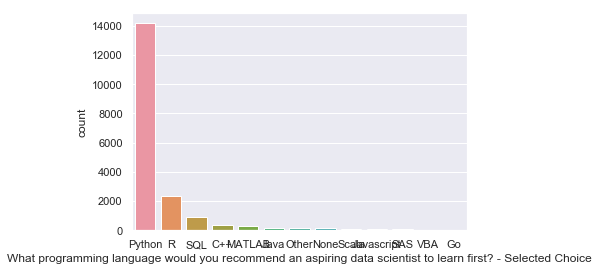

most common languages:
 Python        14181
R              2342
SQL             914
C++             339
MATLAB          256
Java            184
Other           161
None            132
Scala            74
Javascript       72
SAS              69
VBA              38
Go               26
Name: What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice, dtype: int64


In [27]:
mostCommonLanguage = multipleChoiceResponses.iloc[:,86]
mostCommonLanguage.value_counts()

sns.countplot(mostCommonLanguage, order=mostCommonLanguage.value_counts().index)
plt.show()
print("most common languages:\n", mostCommonLanguage.value_counts())

In [28]:
employerIndustry = multipleChoiceResponses.iloc[:,9]
employerIndustry.value_counts()

Computers/Technology                      5584
I am a student                            4658
Academics/Education                       2749
Accounting/Finance                        1433
Other                                      940
Online Service/Internet-based Services     871
Medical/Pharmaceutical                     751
Government/Public Service                  636
Insurance/Risk Assessment                  564
Manufacturing/Fabrication                  563
Marketing/CRM                              483
Retail/Sales                               454
Energy/Mining                              447
Broadcasting/Communications                374
Online Business/Internet-based Sales       357
Shipping/Transportation                    278
Non-profit/Service                         189
Hospitality/Entertainment/Sports           177
Military/Security/Defense                  177
Name: In what industry is your current employer/contract (or your most recent employer if retired)? - Selec

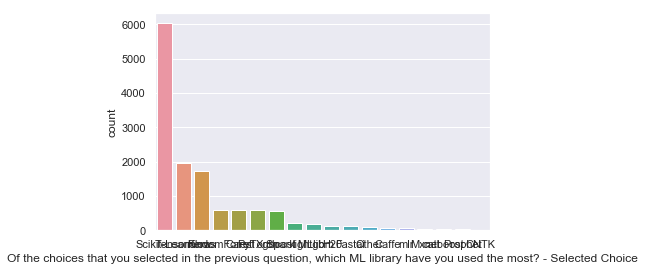


 Scikit-Learn    6039
TensorFlow      1949
Keras           1728
randomForest     598
Caret            589
PyTorch          588
Xgboost          547
Spark MLlib      199
lightgbm         170
H20              132
Fastai           127
Other            103
Caffe             62
mlr               62
Mxnet             31
catboost          26
Prophet           26
CNTK              13
Name: Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice, dtype: int64


In [29]:
mostCommonMLEnv = multipleChoiceResponses.iloc[0:,108]
sns.countplot(mostCommonMLEnv, order=mostCommonMLEnv.value_counts().index)
plt.show()
print("\n",mostCommonMLEnv.value_counts())

In [30]:
ageAndDegreesWithNA = multipleChoiceResponses.iloc[:,3:6]
print("size before dropna: ",ageAndDegreesWithNA.size)
ageAndDegrees = ageAndDegreesWithNA.dropna()
print("size after dropna: ",ageAndDegrees.size)

ageAndDegrees.head()

size before dropna:  71577
size after dropna:  70314


,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
1,45-49,United States of America,Doctoral degree
2,30-34,Indonesia,Bachelor’s degree
3,30-34,United States of America,Master’s degree
4,35-39,United States of America,Master’s degree
5,22-24,India,Master’s degree


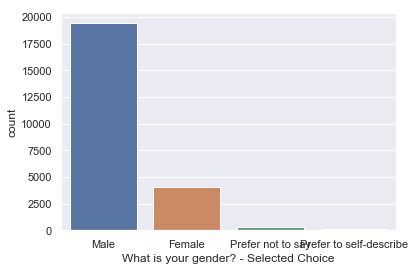

values consist of:
 Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: What is your gender? - Selected Choice, dtype: int64


In [31]:
# countplot of gender

sns.countplot(genders, order=genders.value_counts().index)
plt.show()
print("values consist of:\n",genders.value_counts())

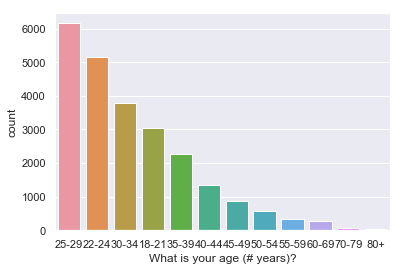

values consist of:
 25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: What is your age (# years)?, dtype: int64


In [32]:
# count plot of age groups

sns.countplot(ages, order=ages.value_counts().index)
plt.show()
print("values consist of:\n", ages.value_counts())

In [33]:
print(countries.value_counts()[:10])
print(len(countries))

United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
France                                                   604
Canada                                                   604
Name: In which country do you currently reside?, dtype: int64
23859


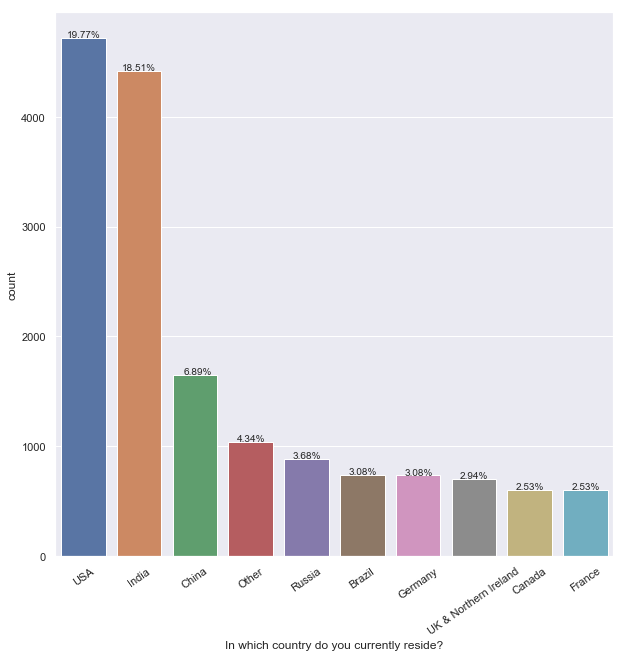

58 different countries

top countries
 United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
France                                                   604
Canada                                                   604
Name: In which country do you currently reside?, dtype: int64


In [34]:
# countplot of countries

f, ax = plt.subplots(figsize=(10,10))

#group25to29 = round(((thosePeople.iloc[:,3].value_counts()[0]/len(thosePeople))*100), 2)
#ax = sns.countplot(thosePeople.iloc[:,3], order=thosePeople.iloc[:,3].value_counts().index)
#ax.text(-.55, 975, (str(group25to29)+'%'), fontsize=10)

usa = round(((countries.value_counts()[0]/len(countries))*100), 2)
india = round(((countries.value_counts()[1]/len(countries))*100), 2)
china = round(((countries.value_counts()[2]/len(countries))*100), 2)
other = round(((countries.value_counts()[3]/len(countries))*100), 2)
russia = round(((countries.value_counts()[4]/len(countries))*100), 2)
brazil = round(((countries.value_counts()[5]/len(countries))*100), 2)
germany = round(((countries.value_counts()[6]/len(countries))*100), 2)
uk = round(((countries.value_counts()[7]/len(countries))*100), 2)
canada = round(((countries.value_counts()[8]/len(countries))*100), 2)
france = round(((countries.value_counts()[9]/len(countries))*100), 2)
ax.text(-.3, 4725, (str(usa)+'%'), fontsize=10)
ax.text(.7, 4425, (str(india)+'%'), fontsize=10)
ax.text(1.8, 1655, (str(china)+'%'), fontsize=10)
ax.text(2.75, 1045, (str(other)+'%'), fontsize=10)
ax.text(3.75, 890, (str(russia)+'%'), fontsize=10)
ax.text(4.75, 745, (str(brazil)+'%'), fontsize=10)
ax.text(5.75, 740, (str(germany)+'%'), fontsize=10)
ax.text(6.75, 705, (str(uk)+'%'), fontsize=10)
ax.text(7.75, 606, (str(canada)+'%'), fontsize=10)
ax.text(8.75, 606, (str(france)+'%'), fontsize=10)
sns.countplot(countries, order=countries.value_counts()[:10].index)
ax.set_xticklabels(['USA', 'India', 'China', 'Other', 'Russia', 'Brazil', 'Germany', 'UK & Northern Ireland', 'Canada', 'France'])
plt.xticks(rotation=35)
plt.show()
print(countries.value_counts().size, "different countries\n")
print("top countries\n",countries.value_counts()[:10])